# <center>Game Review Rating Predictor</center>
Name: Elison Tuscano<br>
UTA ID:1001738728

For Web demo : [click here](https://gamerating.herokuapp.com)

For Github Source Code : [click here](https://github.com/elisontuscano/Game-Review-Predictor)

For Video demo : [click here](https://youtu.be/DKhssm9wXPw)

For Blog : [click here](http://elisontuscano.uta.cloud/cv/Blog.html)

For Kaggle : [click here]()

## Contents:
1. Approach
    - [Click Here](#Approach)

2. Data Visualization 
    - [Click Here](#Data-Visualization )

3. Prepare Input Data
    - [Click Here](#Input-Data:)
    
4. Classification techniques
    - [Click Here](#Classification:)
    
  1. Naive Bayes
  2. Random Forest
  3. Ridge Classifier
  4. Ensemble Voting Classifier
  5. Trying Artificial neural network
  

5. Choosing the Best one:
    - [Click Here](#Best-Classifier)
    
6. Finally Testing on Test Data
    - [Click Here](#Final-Test)
    
6. Deployment Instruction
    - [Click Here](#Deploy)
    

Challenges
- [Click Here](#Challenges: )


References
- [Click Here](#References: )

## Approach
### Introduction
Text analysis is an important part of AI technology that uses Natural Language Processing to transform unstructured text into Normalized, Structured data suitable for Machine Learning algorithms. There are various methods to convert raw textual data into meaningfull information by performing mathematical computations inorder to transform text data into numerical data. The aim of this project is to handle large data and create a review rating classifier to predict the rating.The text data is first cleaned by removing special characters, removing stopwords 
and vectorizing it. The vectorized text is served as an input to the classification models. Different models are compared and best is applyed on the test Data.Finally a web user interface is create for the application and hosted on cloud inorder to access it from anywhere

### Aim of this project
The purpose of this project is to predict a rating for a certain review provided for the user. The main challenge of this project is to handle large dataset and understand different classification model. After that create a Web user interface and host it to cloud.

## Dataset Description
The Dataset was obtained from kaggle whose link is given in reference. The dataset is size 1Gb divided into 3 files. Out of those 3 files we will be using onlu the bgg-13m-review file as it content reviews and their rating which is required to create our model.The dataset has 13 million reviews but as some rows are empty we drop them are left with 2.6 million reviews. we will only be using :
- comment
- rating

### Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

#hide Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Dataset/bgg-13m-reviews.csv')
dataset.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


Only the comment and rating columm will be used. Comment will be used to predict the rating of the user. Currently for the purpose of this application i will not use anything else hence i will remove other columns to reduce space and computation cost.

In [3]:
dataset=dataset.iloc[:,[2,3]]
dataset

,rating,comment
0,10.0,NaN
1,10.0,NaN
2,10.0,"Currently, this sits on my list as my favorite..."
3,10.0,"I know it says how many plays, but many, many ..."
4,10.0,NaN
...,...,...
13170068,3.0,NaN
13170069,3.0,"Lego created a version of Pictionary, only you..."
13170070,2.5,This game is very similar to Creationary. It c...
13170071,2.0,This game was really bad. Worst that I've pla...


In [4]:
dataset.shape

(13170073, 2)

The available dataset is 13 million but it contains few empty rows in the dataset as we can see above. We will drop the empty rows as it will just consfuse our classification model. Pandas comes with a build function called dropna which will detect all the 'NaN' i.e empty rows and delete them.

In [5]:
dataset.dropna(subset=['comment'],inplace=True)
dataset=dataset.sample(frac=1).reset_index(drop=True)
dataset

,rating,comment
0,9.0,Fantastic wargame as simple to learn as deep t...
1,7.0,"Good, fun party game. Not easy to explain/mime..."
2,7.5,"Really enjoy playing this with our children, n..."
3,8.0,Good & fast play game. My wife likes playing i...
4,4.0,Slick production value and a neat core concept...
...,...,...
2637751,3.0,the biggest element missing is FUN. Overcompli...
2637752,2.0,This game has the worst ending I've ever seen....
2637753,3.0,i guess it's ok for a carcassonne game..
2637754,6.0,A really fantastic concept and it is huge! I w...


In [6]:
dataset.shape

(2637756, 2)

After removing the empty rows the dataset is reduced to 2.6 million containing reviews and their ratings. As we will be used review to predict the rating. X our independent input variable will be the comment column and Y will be the dependent output variable.<br>
hence we store the comment and rating in X and Y respectively.

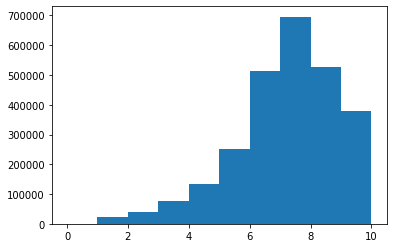

In [7]:
plt.hist(dataset['rating'])
plt.show()

The above historgram shows the distribution of ratings. As we can see above the highest rows for rating consist of 7 and lowest is 1 . Majority of rating are from 6-10 .Hence we can say that the data available is unbalanced.

In [8]:
X=dataset['comment'].values
Y=dataset['rating'].values

The ratings are floating numbers ranged from 1 to 10. So 8.5 and 8.6 will be counted as 2 different categories hence we round them up.

In [9]:
for index ,rate in enumerate(Y):
    Y[index]=int(round(rate))
Y

array([9., 7., 8., ..., 3., 6., 9.])

Ideally the whole dataset would be divide into 75% training and 25 % testing.From the 75%training we further divide the data into 75% training and 25% development. Running different model and parameter testing on training and testing with devevelopment data optimal approach is selected and the final accuracy is removed on test data.

Now as the dataset is huge which require a machine with good computation power what i will do i take 10% for training purpose and remaining shall be kept for testing. from the training data 75% would be training data and 25% would be development data

In [10]:
X_test, X_Sample1, Y_test, Y_Sample1 = train_test_split(X, Y, test_size = 0.1)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_Sample1, Y_Sample1, test_size = 0.25)
X_train.shape

(197832,)

X_train.shape tells us the size of the actual train data at our disposal which we will be using to create our classification models.

## Data Visualization 
let's try to Visualize and try to find few insights if possible from the Dataset before applying any classification algorithm.

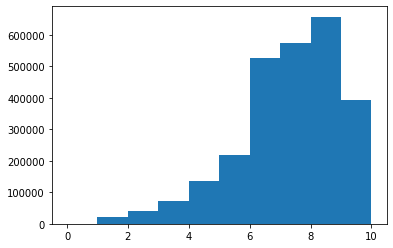

In [11]:
plt.hist(dataset['rating'])
plt.show()

<b>There certainly is a change after rounding the ratings but the majority of the data still remains between 6-10 indicating the data is unbalanced.

Below are the Top 10 most frequently occurring words with their word count.</b>

In [12]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(X_train, 10)
#for word, freq in common_words:
#    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['comment' , 'count'])
df1.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 10 words in review before removing stop words')

<b>As majority of the words are stopwards it is better to remove the stop words as they do not provide any additional information.</b>

In [13]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(X_train, 10)
#for word, freq in common_words:
#    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['comment' , 'count'])
df2.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 10 words in review after removing stop words')

<b>The most occuring word in our dataset is 'game' after removing the stopwords which makes sense. other top 10 frequency words are( like , fun ,good) which implies that the data is inclined more towards positive ratings . The lack of negative words can be clearly seen through this bar graph</b>

In [14]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(X_train, 10)
#for word, freq in common_words:
#    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['comment' , 'count'])
df4.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 10 bigrams in review after removing stop words')

Once Again the biagram is leaning towards the postive reviews .

In [15]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(X_train, 10)
#for word, freq in common_words:
#    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['comment' , 'count'])
df6.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 10 trigrams in review after removing stop words')

## Input Data:

comment cannot be directly given to the classification model hence we need to follow some setup before giving as an input to our dataset

- Removal of HTML tags: The data sometimes contains HTML tags inside the review   which need to be removed.
- Removal of special Characters such as punctuation mark, hashtag,etc which does not help in predicting the senti- ment which should be removed from each review.
- Tokenization :It is a method that divides the variety of document into small parts called tokens.
Ex: I like this game.
After tokenization the sentence will be shown as ”I”,”like”,”this”,”game”.
- Removal of Stop wards: Stop words are the commonly occurring words such as ”and”,”the”,etc. They occur in almost all of the document but does not help in predicting the sentiment as removing them creates an efficient model
- Finally reviews are ready to be converted into bag of words to provide as an input to our classification model.

A bag of word is representation of word with its frequency count in the document. Each word is represented with its occurrence in number of documents in the training data. This list will help us to calculate probability of that word occurring and probability of that word occurring in a particular sentiment. But traditional approach to use frequency count, also takes into consideration words that occur in majority of the document. As these words occur a lot only taking frequency count will give them a higher weight-age even thou these words are not a crucial part of the review. Hence we will use TF-IDF to create bag of words in our application which also take inverse document frequency into consideration to give weight-age to the word.

<b>TF-idf (term frequency-inverse document frequency)</b>
is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. Two metrics are multiplied to achieve this: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents. With this we take the first 10000 crucial words from the data into consideration and represent them in vectorized format to give as input to our classification model.Tfidf also has option to remove stopwards and other benefits like remove words than occur less than a certain threshold

In [16]:
#set up tfidfvectorizor
tfidf_vectorizor=TfidfVectorizer(stop_words='english', max_df=0.7,max_features=10000)

In [17]:
#fit and transform train and test set
tfidf_train=tfidf_vectorizor.fit_transform(X_train)

In [18]:
tfidf_train.shape

(197832, 10000)

Now we have our transformed comments saved in tfidf_train this will be used as an input for our classification model. Let's Transform the developement Data as well according to train data

In [19]:
tfidf_dev=tfidf_vectorizor.transform(X_dev)
tfidf_dev.shape

(65944, 10000)

We have our transformed Comment Vectorized and ready to be enter as input for the classification model. Let's start with Classification model.

## Classification:

We will create a few classification models and compare them together to decide the best algorithm for our problem.

### Naive Bayes


Naive Bayes is a probabilistic supervised machine learning algorithm. naive Bayes uses Bayes theorem to calculate probability (review / class1), probability (review / class2), and so on. All of these probabilities are compared. Review belongs to the Class with higher probability.

let's take a simple example with only 2 class positive and negative and understand how the algorithm works.<br>
Bayes Theorem:<br>
P(a / b)=[P (b / a) * P (a)] / [P (b)]<br>
Example:<br>
P(positive/good)= [P (good / positive) * P (positive)] / [P (good)]<br>
where,<br>
P(good/positive) = Number positive documents containing the word ”good” / Number of all positive documents . <br>P(positive)=Number of all positive documents / Total Number of Documents<br>
P(good) = number of documents containing ’good’ / number of all documents<br>

For every word in the review probability of that word with the sentiment shall be removed and multiplied together in order to get the actual answer.<br>
P( a1,a2,a3,a4.. / b)<br>
Example: ”It was a good movie”<br>
After Cleaning and removing Stop-words:”It good movie”<br>
Probability of the review for positive will be calculated: <br>P(positive/It)*P(positive/good/)*P(positive/movie)<br>
Similarly Probability of the review for negative will be calculated: <br>P(negative/It)*P(negative/good)*P(negative/movie)<br>

Based on this probablity concept we need to predict the class labels ranging from 1 to 10.

In [20]:
# Fitting Naive Bayes to the Training set
NaiveClassifier = MultinomialNB()
NaiveClassifier.fit(tfidf_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
# Predicting the Test set results
y_pred = np.round(NaiveClassifier.predict(tfidf_dev))

The model is fitting and result is predicted on development data. Now we shall remove the accuracy by comparing actual label VS predicted label

In [22]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [23]:
nbscore=accuracy_score(Y_dev ,np.round(y_pred)) *100
print('Accuracy on development data : {} %'.format(nbscore))

Accuracy on development data : 30.486473371345387 %


As the accuracy of the model is found to be 30% which is not that bad considering there are 10 classes to predict and we have taken a small sample of available data

But Even if the actual rating is 8 and the algorithm predicted rating is 7 It is still considered wrong. To address this issue we can use range accuracy by keeping a buffer of 1. So when actual rating is 8 the predicted rating should in range between [6,7,8] to accepted as correct. Lets calculated accuracy with this approach.

In [24]:
def range_accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i] or actual[i] == (predicted[i]+1) or actual[i] == (predicted[i]-1) :
            correct += 1
    return correct / float(len(actual)) * 100.0

In [25]:
range_nbscore=range_accuracy_metric(Y_dev, np.round(y_pred))
print('Range Accuracy on development data : {} %'.format(range_nbscore))

Range Accuracy on development data : 67.41780905010312 %


Only accuracy is can be deceiving hence we see the whole classification report with presion ,recall ,f1-score and support to see the performance of the model.

In [26]:
print(metrics.classification_report(Y_dev,np.round(y_pred)))

              precision    recall  f1-score   support

         1.0       0.07      0.00      0.00       468
         2.0       0.04      0.00      0.01      1076
         3.0       0.00      0.00      0.00      1760
         4.0       0.20      0.01      0.01      3380
         5.0       0.24      0.01      0.02      5454
         6.0       0.29      0.37      0.33     13218
         7.0       0.28      0.23      0.25     14295
         8.0       0.32      0.71      0.44     16481
         9.0       0.19      0.01      0.01      5934
        10.0       0.55      0.02      0.04      3878

    accuracy                           0.30     65944
   macro avg       0.22      0.14      0.11     65944
weighted avg       0.28      0.30      0.24     65944



## Random Forest

Comparison with Random Forest: Random forest is a supervised learning algorithm used for classification. Random forest is an ensemble learning method for classi- fication, regression and other task by constructing multiple decision tree. As it constructs multiple decision tree it provides more chances of error elimination.

In [27]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
RFClassifier.fit(tfidf_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# Predicting the Test set results
y_pred = np.round(RFClassifier.predict(tfidf_dev))

In [29]:
rfscore=accuracy_score(Y_dev ,np.round(y_pred)) *100
print('Accuracy on development data : {} %'.format(rfscore))

Accuracy on development data : 25.965971127016864 %


In [30]:
range_rfscore=range_accuracy_metric(Y_dev, np.round(y_pred))
print('Range Accuracy on development data : {} %'.format(range_rfscore))

Range Accuracy on development data : 62.695620526507334 %


In [31]:
print(metrics.classification_report(Y_dev,np.round(y_pred)))

              precision    recall  f1-score   support

         1.0       0.19      0.09      0.12       468
         2.0       0.13      0.05      0.07      1076
         3.0       0.11      0.05      0.07      1760
         4.0       0.13      0.07      0.09      3380
         5.0       0.15      0.10      0.12      5454
         6.0       0.26      0.32      0.29     13218
         7.0       0.25      0.29      0.27     14295
         8.0       0.31      0.43      0.36     16481
         9.0       0.19      0.06      0.10      5934
        10.0       0.29      0.09      0.14      3878

    accuracy                           0.26     65944
   macro avg       0.20      0.15      0.16     65944
weighted avg       0.24      0.26      0.24     65944



## Ridge Classifier
Ridge classifier is a classification algorithm that uses ridge regression to classify multi-nomial values. For multi-class classification, n_class classifiers are trained in a one-versus-all approach

Let's try one more algorithm and then try ensemble method to combine these algorithm with ensemble voting classifier. 

In [32]:
from sklearn.linear_model import RidgeClassifier
Ridgeclassifier=RidgeClassifier()
Ridgeclassifier.fit(tfidf_train, Y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [33]:
# Predicting the Test set results
y_pred = np.round(Ridgeclassifier.predict(tfidf_dev))

In [34]:
ridge_score=accuracy_score(Y_dev ,np.round(y_pred)) *100
print('Accuracy on development data : {} %'.format(ridge_score))

Accuracy on development data : 30.27720490112823 %


In [35]:
range_ridge_score=range_accuracy_metric(Y_dev, np.round(y_pred))
print('Range Accuracy on development data : {} %'.format(range_ridge_score))

Range Accuracy on development data : 68.03954870799465 %


In [36]:
print(metrics.classification_report(Y_dev,np.round(y_pred)))

              precision    recall  f1-score   support

         1.0       0.36      0.07      0.12       468
         2.0       0.25      0.02      0.04      1076
         3.0       0.16      0.02      0.03      1760
         4.0       0.21      0.05      0.08      3380
         5.0       0.20      0.06      0.09      5454
         6.0       0.30      0.37      0.33     13218
         7.0       0.28      0.29      0.28     14295
         8.0       0.33      0.58      0.42     16481
         9.0       0.19      0.04      0.07      5934
        10.0       0.33      0.14      0.19      3878

    accuracy                           0.30     65944
   macro avg       0.26      0.16      0.17     65944
weighted avg       0.28      0.30      0.26     65944



## Ensemble method- Voting Classifier

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [37]:
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('naive', NaiveClassifier))
estimators.append(('random', RFClassifier))
estimators.append(('ridge', Ridgeclassifier))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(tfidf_train, Y_train)

VotingClassifier(estimators=[('naive',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)),
                             ('random',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_

In [38]:
y_pred = np.round(ensemble.predict(tfidf_dev))

In [39]:
ebscore=accuracy_score(Y_dev ,np.round(y_pred)) *100
print('Accuracy on development data : {} %'.format(ebscore))

Accuracy on development data : 30.142241902220068 %


In [40]:
range_ebscore=range_accuracy_metric(Y_dev, np.round(y_pred))
print('Range Accuracy on development data : {} %'.format(range_ebscore))

Range Accuracy on development data : 67.31924056775446 %


In [41]:
print(metrics.classification_report(Y_dev,np.round(y_pred)))

              precision    recall  f1-score   support

         1.0       0.21      0.07      0.11       468
         2.0       0.16      0.04      0.06      1076
         3.0       0.15      0.03      0.05      1760
         4.0       0.17      0.05      0.08      3380
         5.0       0.16      0.05      0.08      5454
         6.0       0.29      0.41      0.34     13218
         7.0       0.27      0.24      0.26     14295
         8.0       0.33      0.62      0.43     16481
         9.0       0.21      0.01      0.02      5934
        10.0       0.49      0.05      0.10      3878

    accuracy                           0.30     65944
   macro avg       0.24      0.16      0.15     65944
weighted avg       0.28      0.30      0.25     65944



### Artificial Neural Network

ANN is a part of deep learning where each node is represented as a neuron. It has an input layer, hidden layer and output layer. Each input will be represented by a neuron in the input layer. We have 10000 words vector which will be provided to our 10000 input neurons. The output required is to classify the rating from 1- 10 hence we use sparse_categorical_entropy.

It has total of 2.5 million params. Activation function used is ”relu” for our hidden layers and activation function used for output layer is ”softmax ” as we want the answer to be categorized. Adam a type of stochastic gradient descent is used as the optimizer. The neural network was created using tensor- flow and keras. 

As neural network is computationaly expensive they below code was runned only once on a small sample. Even with small data it managed to get accuracy closed to 50%. They code is working and kept in mardown file so wont be used further for our comaprison 

In [42]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu', input_dim = 10000))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'softmax'))

classifier.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2560256   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 11)                715       
Total params: 2,577,419
Trainable params: 2,577,419
Non-trainable params: 0
_________________________________________________________________


```python
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(tfidf_train, Y_train, batch_size = 10, nb_epoch = 5,validation_data=(tfidf_dev,Y_dev))
```



    Train on 197832 samples, validate on 65944 samples
    Epoch 1/5
    197832/197832 [==============================] - 397s 2ms/step - loss: 1.7407 - accuracy: 0.3109 - val_loss: 1.7073 - val_accuracy: 0.3221
    Epoch 2/5
    197832/197832 [==============================] - 405s 2ms/step - loss: 1.6444 - accuracy: 0.3454 - val_loss: 1.7066 - val_accuracy: 0.3239
    Epoch 3/5
    197832/197832 [==============================] - 412s 2ms/step - loss: 1.5061 - accuracy: 0.4081 - val_loss: 1.7890 - val_accuracy: 0.3102
    Epoch 4/5
    197832/197832 [==============================] - 420s 2ms/step - loss: 1.2689 - accuracy: 0.5124 - val_loss: 2.0374 - val_accuracy: 0.2928
    Epoch 5/5
    197832/197832 [==============================] - 419s 2ms/step - loss: 1.0152 - accuracy: 0.6188 - val_loss: 2.5407 - val_accuracy: 0.2789


    <keras.callbacks.callbacks.History at 0x1a4600d4d0>

### Best Classifier

Once we have accuracies and range accuracies of all the classifiers we can compare them to see which fits best with our data. Let's visualize them in a bar plot to get a better understanding.

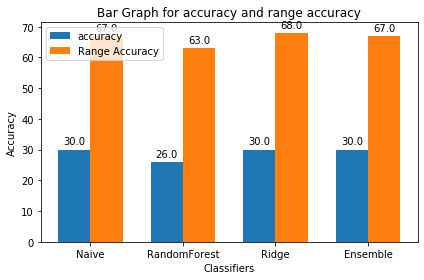

In [43]:
labels = ['Naive', 'RandomForest', 'Ridge', 'Ensemble']
acc=np.round([nbscore,rfscore,ridge_score,ebscore])
rangeacc= np.round([range_nbscore,range_rfscore,range_ridge_score,range_ebscore])

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc, width, label='accuracy')
rects2 = ax.bar(x + width/2, rangeacc, width, label='Range Accuracy')

ax.set_title('Bar Graph for accuracy and range accuracy')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

As we can see above that Ridge Classifier gives us the best accuracy so far hence we will be using Ridge Classifier on our test Data. We will remove the Final Accuracy of the test data using our Ridge Classifier model.

## Saving the model

In [44]:
from sklearn.externals import joblib
joblib.dump(Ridgeclassifier,'model/ridge_model.sav')
joblib.dump(tfidf_vectorizor,'model/tfidf_model.sav')
joblib.dump(NaiveClassifier,'model/naive_model.sav')
joblib.dump(RFClassifier,'model/randomforest_model.sav')
joblib.dump(ensemble,'model/ensemble_model.sav')

['model/ensemble_model.sav']

## Final Test

In [45]:
tfidf_test=tfidf_vectorizor.transform(X_test)

In [46]:
y_pred = np.round(Ridgeclassifier.predict(tfidf_test))

In [47]:
score=accuracy_score(Y_test ,np.round(y_pred)) *100
print('Accuracy on development data : {} %'.format(score))

Accuracy on development data : 30.132477948424164 %


In [48]:
rangescore=range_accuracy_metric(Y_test, np.round(y_pred))
print('Range Accuracy on development data : {} %'.format(rangescore))

Range Accuracy on development data : 67.98309168569237 %


This is the Final accuracy of our model. Let's see how we can used our saved model and make a Friendly Web user interface which we can deploy to cloud

# Deploy

Now to use our application during production we need a User Interface. We will make this with help of flask. Flask is a python library used to create local server can connect it to Web interface.

There is a link in reference that explains flask in detail. our aim is to provide a text area for the user to type the review. we send that input to our classifier and predict the rating. Flask code is my github repository in app.py file

On running the app.py file Flask creates a local server and renders the index.html file in templates folder. for further details see the github code.

We need to create the requirement.txt file. command for that is
>pip freeze>requirement.txt

To let heroku know that it has to run the app.py file we will mention that in the Profile
>web:gunicorn app:app

Finally to host the application to heroku we initiatiliaze git repository and publish to heroku with simple git push.
>git init

>git add .

>git commit

>git push heroku master

Done !!! Your application will be hosted to heroku cloud platform

## Challenges:

As the dataset was huge Initially had to sample the data and try different techniques to get the best option and test that technique on the whole data. Tried various algorithms to classify the review and predict the rating finally combining them with ensemble voting classifier

In order to make GUI and deploy it to cloud. Studied Flask and connecting prediction model to it. Understood the working of heroku clost hosting for deploying the classification model.


As the accuracy for 10 class label is not more than 30%. Created a accuracy function to calculate range accuracy with range of [+1 ,-1] which gives a better understanding of the performance of the algorithm.

## References:

1. Dataset:https://www.kaggle.com/jvanelteren/boardgamegeek-reviews 

2. Deploy with Flask : https://www.youtube.com/watch?v=Z1RJmh_OqeA&feature=youtu.be

3. https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html

5. https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

6. https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
